In [1]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt


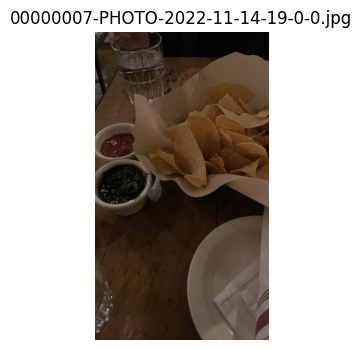

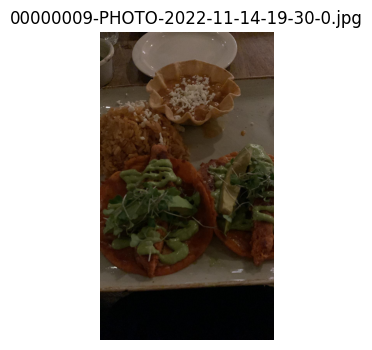

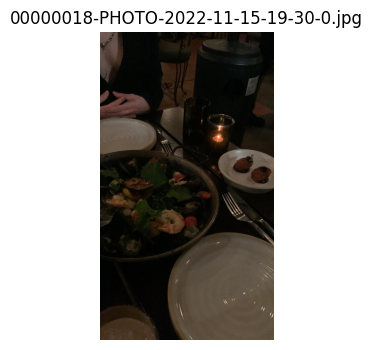

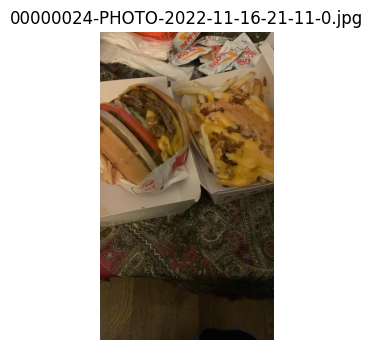

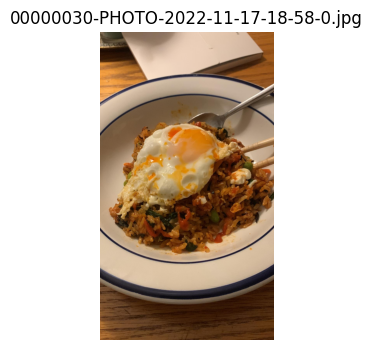

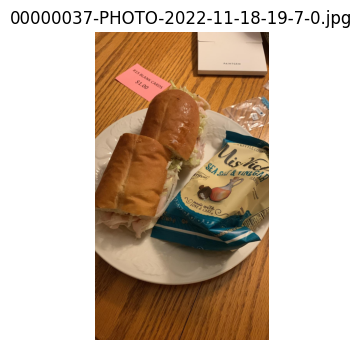

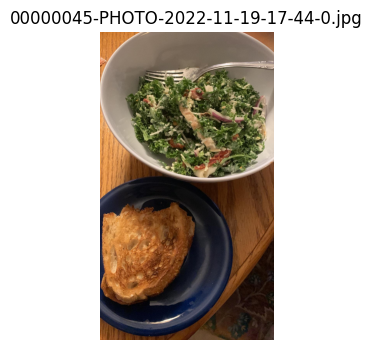

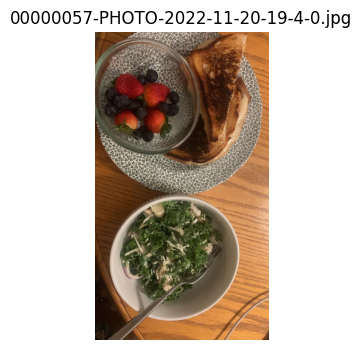

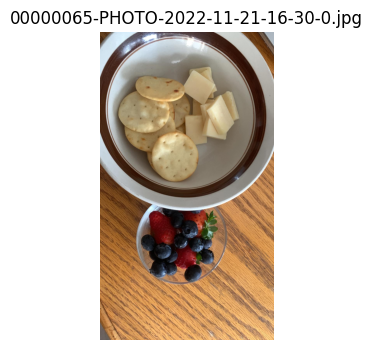

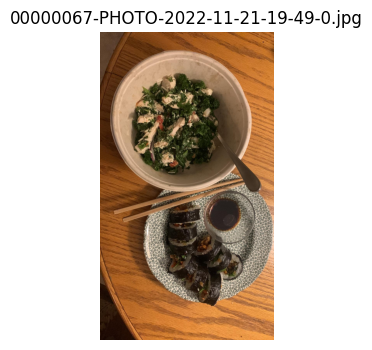

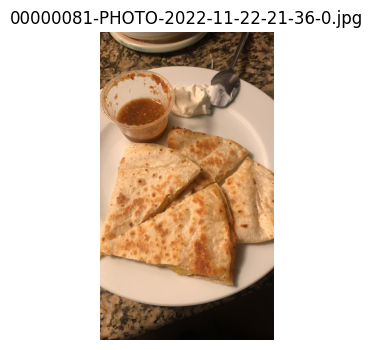

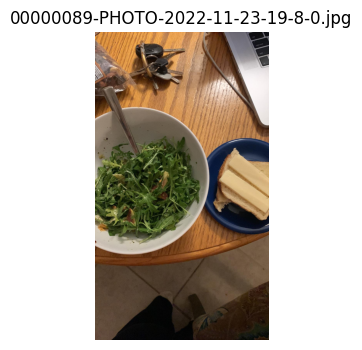

In [16]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Replace this with your actual CSV path
csv_path = "data/CGMacros-048/CGMacros-048.csv"

# Load CSV
df = pd.read_csv(csv_path)

# Extract folder name from CSV path (e.g., CGMacros-001)
participant_folder = os.path.basename(os.path.dirname(csv_path))

# Build base image path
base_path = os.path.join("data", participant_folder, "photos")

# Filter dinner images
df['Missing'] = df['Meal Type'].isna()
exists_dinner = df[~df['Missing'] & (df['Meal Type'].str.lower() == 'dinner')]

# Loop through and show images
for path in exists_dinner['Image path']:
    filename = os.path.basename(path)
    full_path = os.path.join(base_path, filename)

    if os.path.exists(full_path):
        img = Image.open(full_path)
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.axis('off')
        plt.title(filename)
        plt.show()
    else:
        print(f"Image not found: {full_path}")


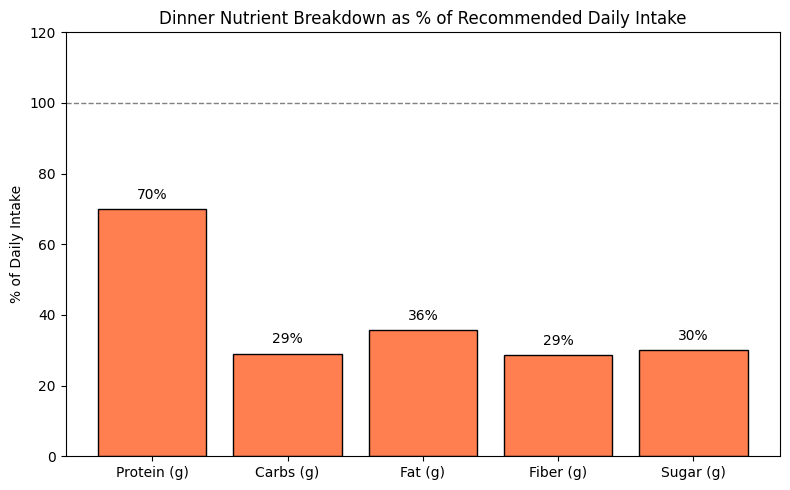

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dinner nutrient data (replace with actual dinner row from CGMacros-001.csv)
dinner_nutrients = {
    'Protein (g)': 35,
    'Carbs (g)': 80,
    'Fat (g)': 25,
    'Fiber (g)': 8,
    'Sugar (g)': 15
}

# Recommended daily intake (example values)
rdi = {
    'Protein (g)': 50,
    'Carbs (g)': 275,
    'Fat (g)': 70,
    'Fiber (g)': 28,
    'Sugar (g)': 50  # WHO suggests <50g/day
}

# Create a DataFrame for plotting
nutrients = pd.DataFrame({
    'Nutrient': list(dinner_nutrients.keys()),
    'Dinner': list(dinner_nutrients.values()),
    'RDI': [rdi[n] for n in dinner_nutrients.keys()]
})

nutrients['% of Daily Intake'] = nutrients['Dinner'] / nutrients['RDI'] * 100

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(nutrients['Nutrient'], nutrients['% of Daily Intake'], color='coral', edgecolor='black')

# Annotate each bar with the percent
for bar, pct in zip(bars, nutrients['% of Daily Intake']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f"{pct:.0f}%", ha='center', va='bottom', fontsize=10)

plt.axhline(100, color='gray', linestyle='--', linewidth=1)
plt.title("Dinner Nutrient Breakdown as % of Recommended Daily Intake")
plt.ylabel("% of Daily Intake")
plt.ylim(0, max(nutrients['% of Daily Intake'].max(), 100) + 20)
plt.tight_layout()
plt.show()


In [16]:
bio = pd.read_csv("data/bio.csv")
bio

,subject,Age,Gender,BMI,Body weight,Height,Self-identify,A1c PDL (Lab),Fasting GLU - PDL (Lab),Insulin,...,LDL (Cal),VLDL (Cal),Cho/HDL Ratio,Collection time PDL (Lab),#1 Contour Fingerstick GLU,Time (t),#2 Contour Fingerstick GLU,Time (t).1,#3 Contour Fingerstick GLU,Time (t).2
0,1,27,M,22.265239,133.8,65.00,Hispanic/Latino,5.4,91,2.5,...,130,13,2.9,11:06:00 AM,89,9:40,73,12:11,81,13:18
1,2,49,F,30.946742,169.2,62.00,Hispanic/Latino,5.5,93,14.8,...,78,12,2.0,7:38:00 AM,91,7:52,123,9:21,80,10:22
2,3,59,F,26.948690,157.0,64.00,Hispanic/Latino,6.5,118,17.4,...,90,31,2.6,7:25:00 AM,119,7:38,166,9:23,98,10:23
3,4,33,F,42.384279,262.6,66.00,Hispanic/Latino,5.5,105,19.4,...,164,60,5.8,7:20:00 AM,109,7:37,110,9:04,90,10:01
4,5,51,F,30.957534,172.0,62.50,Hispanic/Latino,6.6,144,12.9,...,157,78,7.1,7:45:00 AM,139,8:59,215,10:52,130,11:54
5,6,51,F,29.303451,197.0,68.75,White,5.2,96,6.4,...,118,15,2.8,7:45:00 AM,98,9:04,97,10:54,70,11:56
6,7,66,F,27.070327,199.6,72.00,Hispanic/Latino,5.9,108,15.9,...,67,18,3.0,8:00:00 AM,115,8:40,157,10:22,95,11:24
7,8,54,M,39.945440,218.4,62.00,Hispanic/Latino,5.8,112,17.7,...,95,29,3.0,8:55:00 AM,110,9:07,156,10:25,94,11:26
8,9,34,F,37.001506,183.2,59.00,Hispanic/Latino,5.7,122,25.7,...,108,62,5.1,7:32:00 AM,119,7:46,128,9:32,96,10:29
9,10,54,F,35.811892,195.8,62.00,Hispanic/Latino,5.7,100,15.3,...,110,20,3.3,7:44:00 AM,100,8:01,160,9:35,108,10:36


In [7]:
test = pd.read_csv("data/CGMacros-048/CGMacros-048.csv")
test['no_calories'] = test['Calories'].isna()
test = test[test['no_calories'] == False]
test

,Timestamp,Libre GL,Dexcom GL,HR,Calories (Activity),METs,Meal Type,Calories,Carbs,Protein,Fat,Fiber,Amount Consumed,Image path,no_calories
228,2022-11-14 13:02:00,55.800000,84.0,86.0,1.00628,11,lunch,1180.0,81.0,88.0,54.5,18.0,75.0,photos/00000005-PHOTO-2022-11-14-13-2-0.jpg,False
586,2022-11-14 19:00:00,62.733333,76.2,112.0,1.28072,14,dinner,20.0,2.0,0.0,2.0,2.0,0.0,photos/00000007-PHOTO-2022-11-14-19-0-0.jpg,False
616,2022-11-14 19:30:00,56.133333,53.6,98.0,1.18924,13,dinner,723.0,97.0,36.0,21.0,10.0,0.0,photos/00000009-PHOTO-2022-11-14-19-30-0.jpg,False
1446,2022-11-15 09:35:00,72.800000,90.4,99.0,1.18898,13,breakfast,448.0,66.0,22.0,10.5,0.0,100.0,photos/00000014-PHOTO-2022-11-15-9-35-0.jpg,False
1693,2022-11-15 13:42:00,62.266667,66.0,104.0,1.18898,13,lunch,830.0,92.0,17.0,42.0,10.0,100.0,photos/00000016-PHOTO-2022-11-15-13-42-0.jpg,False
2041,2022-11-15 19:30:00,92.933333,77.4,97.0,1.18898,13,dinner,336.0,45.0,11.0,12.0,6.0,0.0,photos/00000018-PHOTO-2022-11-15-19-30-0.jpg,False
2940,2022-11-16 10:29:00,84.000000,82.6,122.0,4.38912,47,breakfast,608.0,66.0,66.0,10.5,0.0,100.0,photos/00000020-PHOTO-2022-11-16-10-29-0.jpg,False
3268,2022-11-16 15:57:00,70.800000,93.0,99.0,1.09728,12,lunch,435.0,16.0,66.0,14.0,4.0,100.0,photos/00000022-PHOTO-2022-11-16-15-57-0.jpg,False
3582,2022-11-16 21:11:00,105.000000,126.4,100.0,2.56032,27,dinner,1420.0,93.0,56.0,83.0,5.0,200.0,photos/00000024-PHOTO-2022-11-16-21-11-0.jpg,False
4202,2022-11-17 07:31:00,53.800000,94.0,115.0,4.08672,44,breakfast,712.0,66.0,22.0,42.0,0.0,100.0,photos/00000026-PHOTO-2022-11-17-7-31-0.jpg,False


/var/folders/1_/l6tr0bbn3mb7vblmfq8qmf_40000gn/T/ipykernel_55031/3488667383.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  today_meals['Meal Type'] = pd.Categorical(today_meals['Meal Type'], categories=meal_order, ordered=True)


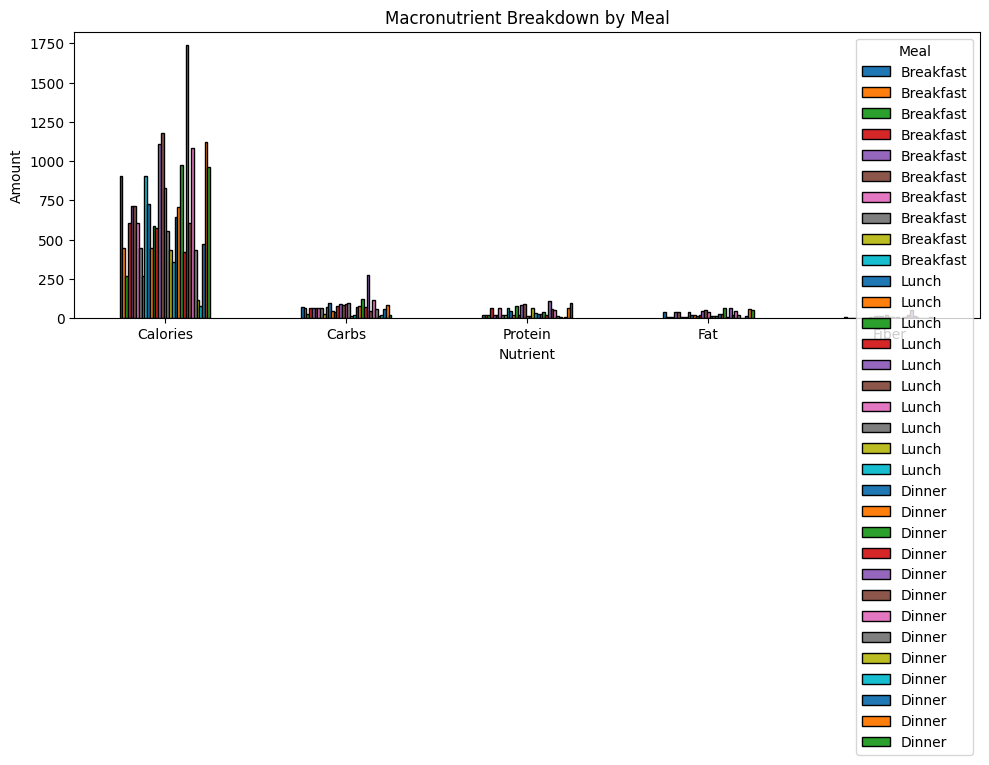

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already loaded your DataFrame as `test`
# Filter to only today's meals: breakfast, lunch, dinner
today_meals = test[test['Meal Type'].isin(['Breakfast', 'Lunch', 'Dinner'])]

# Sort by meal order (Breakfast -> Lunch -> Dinner)
meal_order = ['Breakfast', 'Lunch', 'Dinner']
today_meals['Meal Type'] = pd.Categorical(today_meals['Meal Type'], categories=meal_order, ordered=True)
today_meals = today_meals.sort_values('Meal Type')

# Select the nutrients to plot
nutrients = ['Calories', 'Carbs', 'Protein', 'Fat', 'Fiber']

# Create a new DataFrame with just the nutrients and meal type
plot_data = today_meals[['Meal Type'] + nutrients].set_index('Meal Type')

# Transpose so nutrients are grouped together
plot_data = plot_data.T

# Plot
ax = plot_data.plot(kind='bar', figsize=(10, 6), edgecolor='black')

# Formatting
plt.title("Macronutrient Breakdown by Meal")
plt.ylabel("Amount")
plt.xlabel("Nutrient")
plt.xticks(rotation=0)
plt.legend(title="Meal", loc='upper right')
plt.tight_layout()
plt.show()


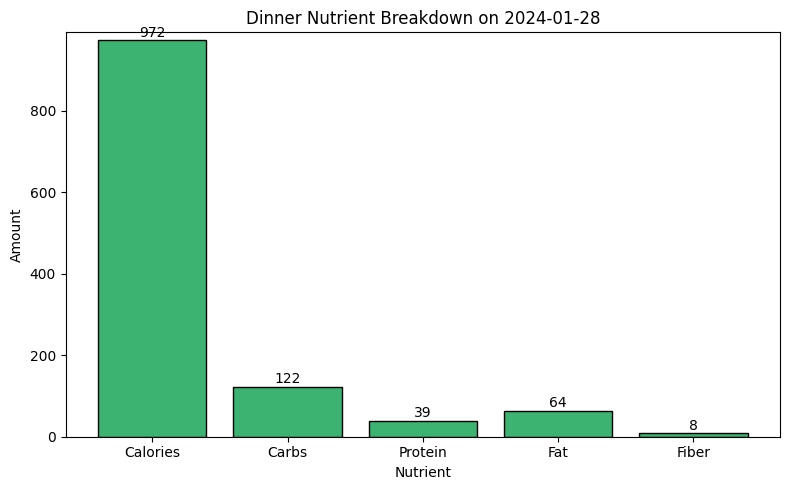

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter one dinner (assume you've already loaded your DataFrame as `test`)
# You can change the index to any specific row that is a dinner
one_dinner = test[test['Meal Type'] == 'Dinner'].iloc[0]

# Extract relevant nutrients
nutrients = ['Calories', 'Carbs', 'Protein', 'Fat', 'Fiber']
values = [one_dinner[n] for n in nutrients]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(nutrients, values, color='mediumseagreen', edgecolor='black')

# Annotate bars with values
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
             f'{value:.0f}', ha='center', va='bottom', fontsize=10)

# Title and labels
plt.title(f"Dinner Nutrient Breakdown on {one_dinner['Timestamp'].split()[0]}")
plt.ylabel("Amount")
plt.xlabel("Nutrient")
plt.ylim(0, max(values) + 20)
plt.tight_layout()
plt.show()
